In [1]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [3]:
(X_train, Y_train), (X_test, Y_test)=mnist.load_data()
print(X_train.shape)
print(Y_train.shape)
X_train=X_train.reshape(60000,784).astype('float32')/255.0
X_test=X_test.reshape(10000,784).astype('float32')/255.0
print(X_train.shape)
print(Y_train.shape)
Y_train=np_utils.to_categorical(Y_train)
Y_test=np_utils.to_categorical(Y_test)
print(Y_train.shape)

(60000, 28, 28)
(60000,)
(60000, 784)
(60000,)
(60000, 10)


In [4]:
model=Sequential()
model.add(Dense(units=64,input_dim=28*28, activation='relu'))
model.add(Dense(units=10,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [7]:
model.fit(X_train,Y_train, epochs=5, batch_size=32)

loss_and_metrics=model.evaluate(X_test, Y_test, batch_size=32)

print('loss_and_evaluate : '+str(loss_and_metrics))

Epoch 1/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.1701 - acc: 0.9518

/Users/paradiso/miniconda3/lib/python3.6/site-packages/matplotlib/colors.py:680: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  not cbook.is_string_like(colors[0]):


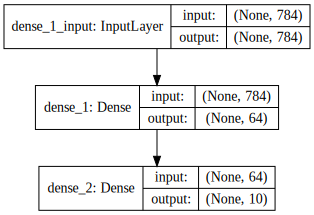

In [8]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model,show_shapes=True).create(prog='dot',format='svg'))

In [10]:
from keras.models import load_model

model.save('mnist_mlp_model.h5')
model=load_model('mnist_mlp_model.h5')